In [3]:
import pandas as pd

# load the data
# add as header the columns names: statement_id, label, statement, subject, speaker, job_title, state, party, barely_true_c, false_c, half_true_c, mostly_true_c, pants_on_fire_c, context
header = ['statement_id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state', 'party', 'barely_true_c', 'false_c', 'half_true_c', 'mostly_true_c', 'pants_on_fire_c', 'context']
test_data = pd.read_csv('./liar_dataset/test.tsv', sep='\t', names=header)
train_data = pd.read_csv('./liar_dataset/train.tsv', sep='\t', names=header)
valid_data = pd.read_csv('./liar_dataset/valid.tsv', sep='\t', names=header)
display(train_data.head())

,statement_id,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphanumeric tokens
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to the 'statement' column
train_data['processed_text'] = train_data['statement'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sigal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sigal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sigal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
from gensim import corpora

# Create a dictionary from the processed text
dictionary = corpora.Dictionary(train_data['processed_text'])

# Create a corpus: a list of bag-of-words representations of each document
corpus = [dictionary.doc2bow(text) for text in train_data['processed_text']]


In [26]:
from gensim.models.ldamodel import LdaModel

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=6, id2word=dictionary, passes=15)

# Print the topics discovered by the model
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.026*"say" + 0.022*"obama" + 0.020*"president" + 0.016*"republican" + 0.014*"barack" + 0.008*"senate" + 0.008*"democrat" + 0.008*"year" + 0.008*"bill" + 0.007*"illegal"')
(1, '0.035*"tax" + 0.023*"say" + 0.014*"pay" + 0.010*"trump" + 0.010*"family" + 0.008*"donald" + 0.008*"would" + 0.007*"want" + 0.007*"american" + 0.007*"cut"')
(2, '0.050*"percent" + 0.015*"rate" + 0.011*"since" + 0.010*"tax" + 0.009*"year" + 0.009*"debt" + 0.009*"time" + 0.008*"obama" + 0.008*"unemployment" + 0.008*"say"')
(3, '0.026*"state" + 0.024*"job" + 0.019*"year" + 0.014*"million" + 0.013*"say" + 0.012*"new" + 0.012*"percent" + 0.010*"people" + 0.009*"united" + 0.008*"every"')
(4, '0.028*"say" + 0.016*"clinton" + 0.012*"hillary" + 0.012*"city" + 0.008*"romney" + 0.007*"said" + 0.007*"state" + 0.006*"support" + 0.006*"crime" + 0.006*"would"')
(5, '0.030*"health" + 0.027*"care" + 0.021*"say" + 0.019*"state" + 0.016*"budget" + 0.012*"billion" + 0.012*"scott" + 0.011*"tax" + 0.010*"cut" + 0.009*"federal"')


In [10]:
pip install pyLDAvis

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of pyfume to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 1.4 MB/s eta 0:00:02
   ------------ --------------------------- 0.8/2.6 MB 1.7 MB/s eta 0:00:02
   -------------------- ------------------- 1.3/2.6 MB 1.7 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 1.7 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 1.8 MB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-non

In [27]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# Save the visualization as an HTML file
pyLDAvis.save_html(lda_display, 'lda_visualization.html')

# Optionally, you can open it directly in the browser
import webbrowser
webbrowser.open('lda_visualization.html')


True

label           barely-true  false  half-true  mostly-true  pants-fire  true
dominant_topic                                                              
0                       374    459        419          369         210   336
1                       283    288        302          270         147   225
2                       206    263        337          325          72   274
3                       310    396        486          473         146   404
4                       213    266        225          200         127   184
5                       268    323        345          325         137   253


<Axes: xlabel='dominant_topic'>

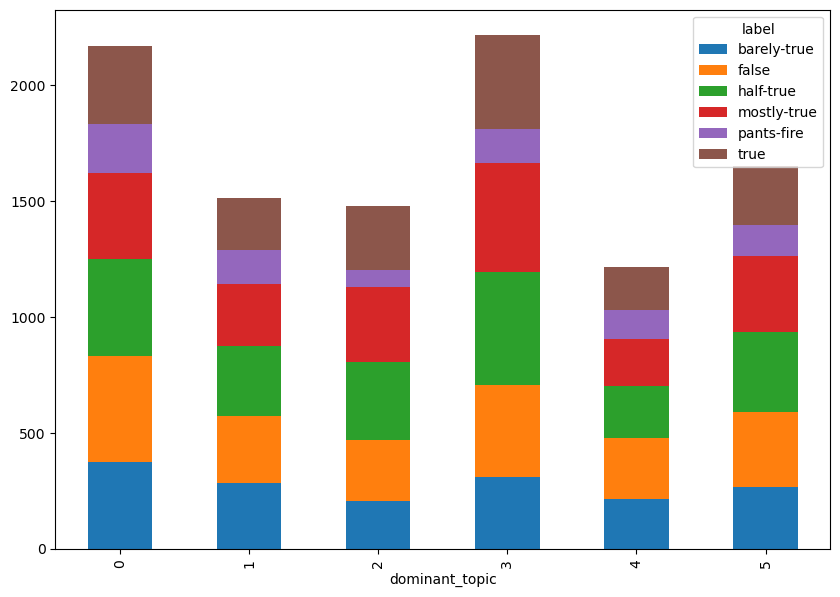

In [28]:
import pandas as pd
import numpy as np

# Get the topic distribution for each document
topic_distributions = lda_model.get_document_topics(corpus, minimum_probability=0)

# Extract the dominant topic for each document
dominant_topics = []
for dist in topic_distributions:
    # dist is a list of (topic_id, probability) tuples
    dominant_topic = max(dist, key=lambda x: x[1])[0]  # Get the topic with the highest probability
    dominant_topics.append(dominant_topic)

# Add the dominant topic to the DataFrame
train_data['dominant_topic'] = dominant_topics

# Group by topic and label to see the distribution of labels within each topic
label_distribution_by_topic = train_data.groupby(['dominant_topic', 'label']).size().unstack(fill_value=0)

# Display the distribution
print(label_distribution_by_topic)

# Optionally, you can visualize the distribution using a bar chart
label_distribution_by_topic.plot(kind='bar', stacked=True, figsize=(10, 7))


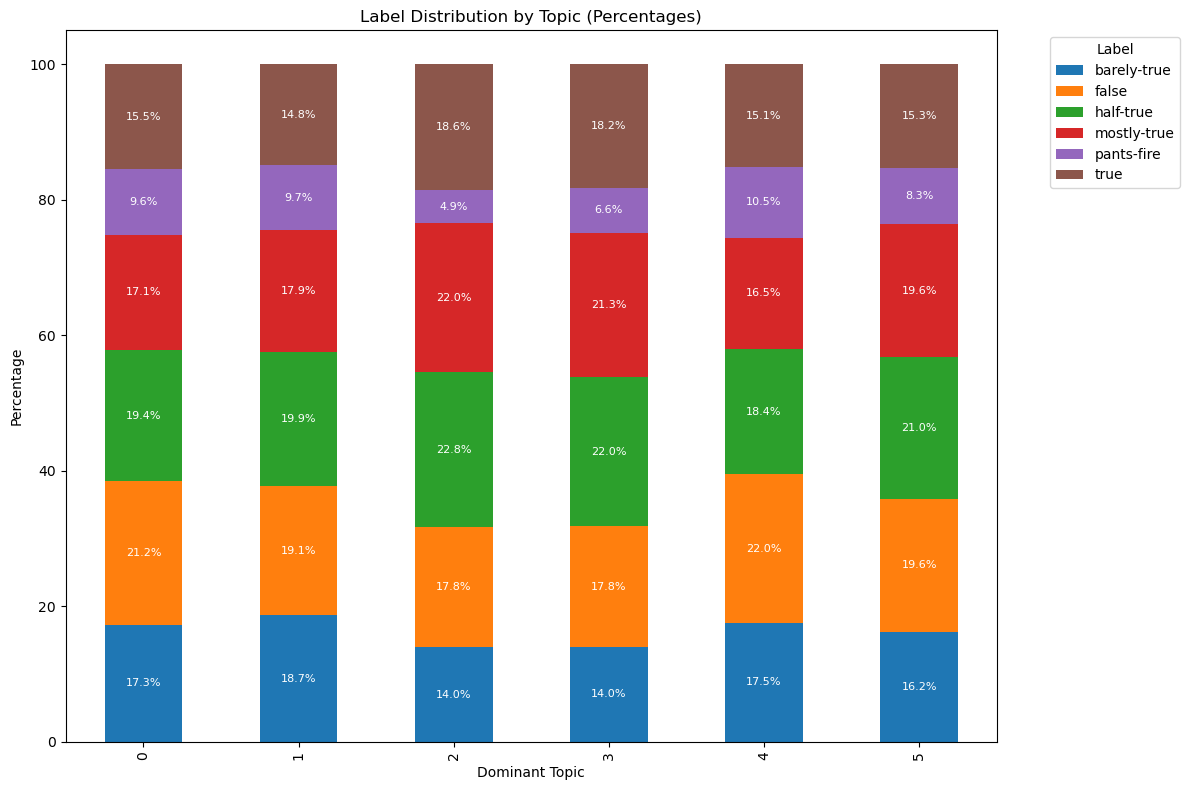

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the topic distribution for each document
topic_distributions = lda_model.get_document_topics(corpus, minimum_probability=0)

# Extract the dominant topic for each document
dominant_topics = []
for dist in topic_distributions:
    # dist is a list of (topic_id, probability) tuples
    dominant_topic = max(dist, key=lambda x: x[1])[0]  # Get the topic with the highest probability
    dominant_topics.append(dominant_topic)

# Add the dominant topic to the DataFrame
train_data['dominant_topic'] = dominant_topics

# Group by topic and label to see the distribution of labels within each topic
label_distribution_by_topic = train_data.groupby(['dominant_topic', 'label']).size().unstack(fill_value=0)

# Calculate the percentage distribution within each topic
label_distribution_percentages = label_distribution_by_topic.div(label_distribution_by_topic.sum(axis=1), axis=0) * 100

# Plot the percentage distribution
fig, ax = plt.subplots(figsize=(12, 8))
label_distribution_percentages.plot(kind='bar', stacked=True, ax=ax)

# Add percentages on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only label non-zero segments
        ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center', fontsize=8, color='white')

# Move the legend outside the plot
ax.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Label Distribution by Topic (Percentages)')
plt.xlabel('Dominant Topic')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


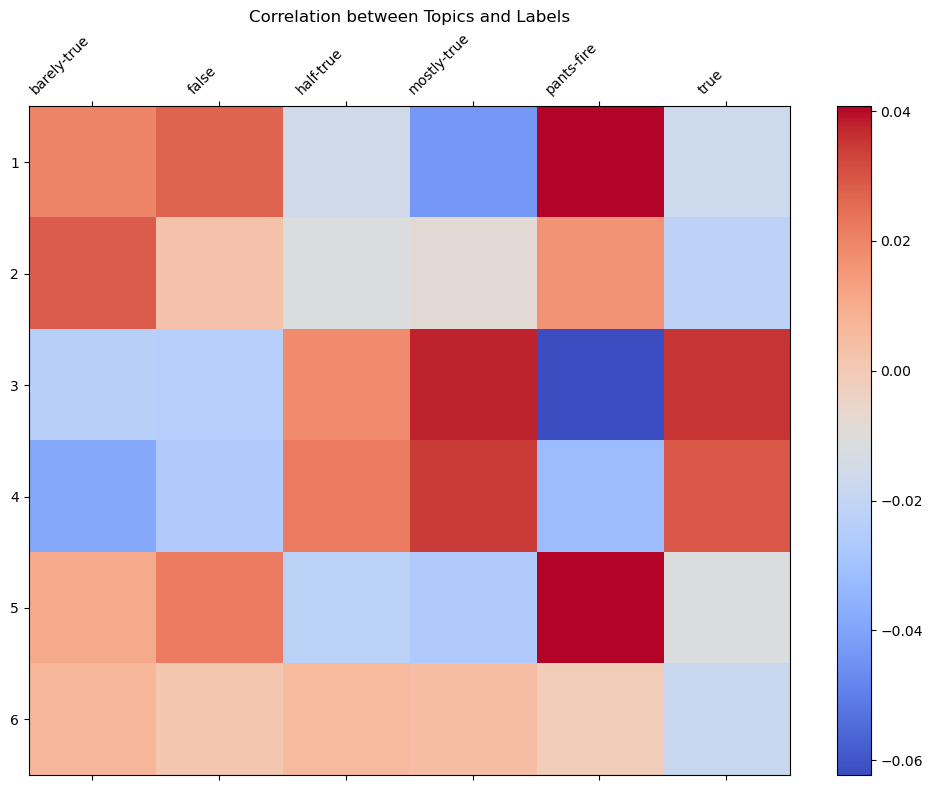

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the topic distribution for each document
topic_distributions = lda_model.get_document_topics(corpus, minimum_probability=0)

# Convert topic distributions to a DataFrame
topic_df = pd.DataFrame([dict(dist) for dist in topic_distributions])

# Add the labels to the DataFrame
topic_df['label'] = train_data['label'].values

# One-hot encode the labels for correlation calculation
label_encoded = pd.get_dummies(topic_df['label'])

# Initialize an empty DataFrame to store the correlations
correlation_df = pd.DataFrame(index=topic_df.columns[:-1], columns=label_encoded.columns)

# Calculate the correlation between each topic and each label
for topic in correlation_df.index:
    for label in correlation_df.columns:
        correlation_df.loc[topic, label] = topic_df[topic].corr(label_encoded[label])

# Convert to float (correlations are numeric)
correlation_df = correlation_df.astype(float)

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_df, cmap='coolwarm', aspect='auto')

# Add a colorbar
fig.colorbar(cax)

# Set the x-axis and y-axis labels
ax.set_xticks(range(len(correlation_df.columns)))
ax.set_yticks(range(len(correlation_df.index)))
ax.set_xticklabels(correlation_df.columns, rotation=45, ha='right')

# Adjust the y-axis labels to display 1-6 instead of 0-5
ax.set_yticklabels(range(1, 7))

plt.title('Correlation between Topics and Labels')
plt.tight_layout()

plt.show()
